# Week 5 Activity: DFT and Spectrogram

Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

In [2]:
from IPython.display import Math, Audio
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

## Build your own DFT

### Step One

Make a simple sinusoid with a periodicity (let's call it "k") below 10 and a very low sample rate (let's call it "N") and for graphing purposes we will set it to 50. Save this array output as variable "s".

In [4]:
# your code here
N = 50
k = 8
n =     np.arange(0, N)                   # time series array 
s = np.sin(2 * np.pi * k * n)

### Step Two

Using a for-loop, compute a cosine and sine wave at every value from 0 through k with the same sample rate as above (N).

At each wave you create, plot on top of each other your original wave (s) and your created wave, k_wave. Put the cosine waves on the left and the sine waves on the right.



C:\Users\jayso\AppData\Local\Temp\ipykernel_23188\4157844671.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


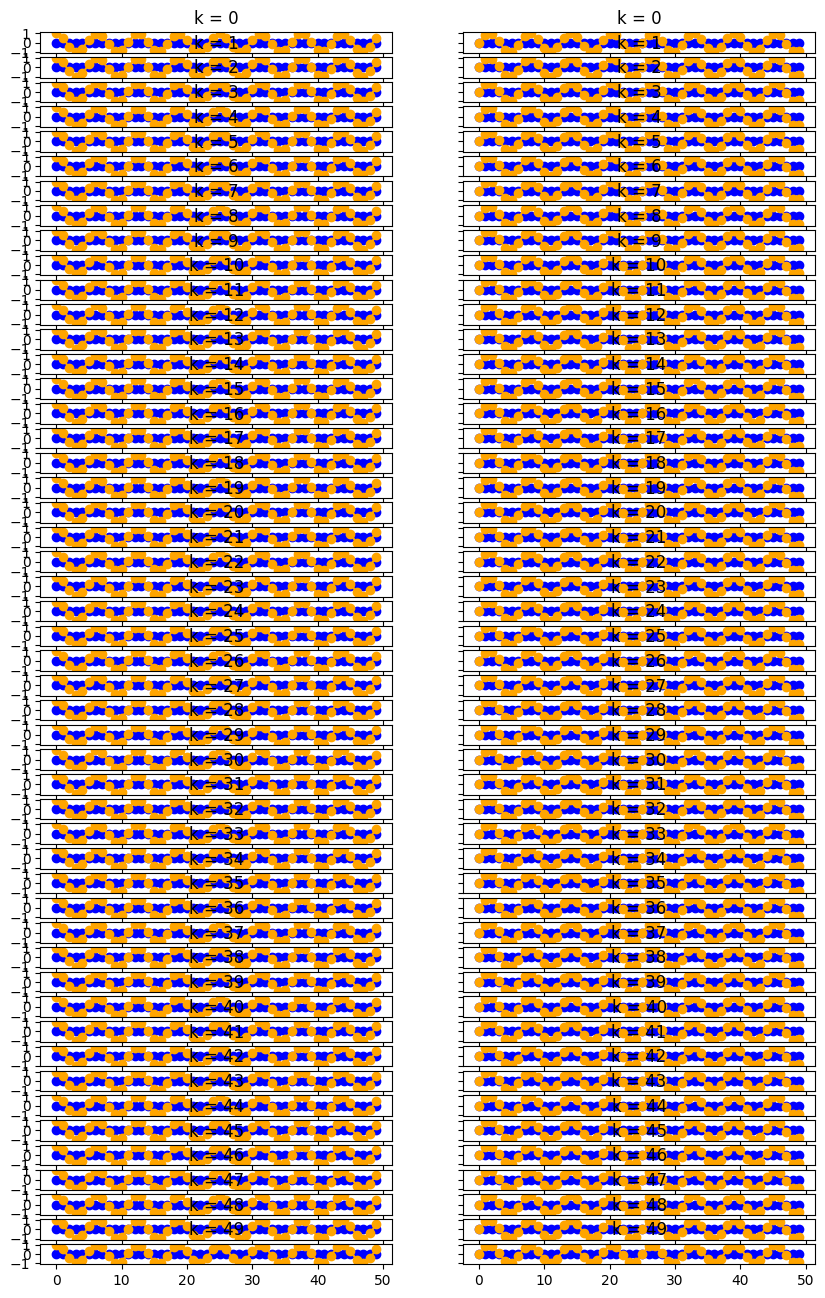

In [5]:
k = k # change manually if you like to another value

fig, axs = plt.subplots(nrows=N, ncols=2, sharex=True, sharey=True, figsize=(10, 2*k))

for i in range(N):
    # Generate cosine and sine waves for the current value of i
    cos_wave =  np.cos(2*np.pi*k*n/N)# use the time array you specified in step one ("n")
    sin_wave = np.sin(2*np.pi*k*n/N)
    
    # Plot original wave 's' and cosine wave on the left
    axs[i, 0].plot(n, s, label='Original Sinusoid', color="blue", marker='o')
    axs[i, 0].plot(n, cos_wave, label=i, color="orange", marker='o')
    axs[i, 0].set_title("k = "+str(i))
    
    # Plot original wave 's' and sine wave on the right
    axs[i, 1].plot(n, s, label='Original Sinusoid',color='blue', marker='o')
    axs[i, 1].plot(n, sin_wave, label=i, color="orange", marker='o')
    axs[i, 1].set_title("k = "+str(i))

plt.tight_layout()
plt.show()
   


### Modify step two
Copy your loop above and modify the code so that:

N and k have the same (maximum) value (i.e., N dictates the range of k)

You will then multiply the two signals together (s * k_wave) and sum (i.e., compute dot product) for each k_wave (sin and cos). You should have two values for every k: one is the dot product of s and your sinusoidal k_wave, and one is the dot product of s and the cosine k_wave.

Print out these two arrays. (*Note: you do not need to plot anything at this stage but you may wish to in order to see the changes when k and N have the same maximum*)

In [8]:
# your code here
X_k = np.array([]) # initialize empty array

for i in range(N):
    # Generate cosine and sine waves for the current value of i
    cos_wave = np.cos(2*np.pi*k*n/N)# use the time array you specified in step one ("n")
    sin_wave = np.sin(2*np.pi*k*n/N)
    
    # append to array: cos - j sin, as a tuple for each component k:
    # multiply original signal, s, with each coefficient and sum each:
    c_coeff_k = 2/N * np.dot(k, cos_wave)
    s_coeff_k = 2/N * np.dot(k, sin_wave)
    
    X_k = np.append(X_k, [c_coeff_k, s_coeff_k])

print(X_k)
    
    

[ 0.32        0.17146457 -0.13624937 ... -0.04010663 -0.28954466
 -0.27018494]


Replace separate sin and cos coefficients with single using complex exponential

In [9]:

basis = np.cos(2*np.pi*k*(n/N)) - 1j*(np.sin(2*np.pi*k*(n/N)))

Wrap all of your code above into one DFT function that returns a complex coefficient for each value of k

In [10]:
# your code here
X_k = np.array([]) # initialize empty array

for i in range(N):
    # Generate cosine and sine waves for the current value of i
    cos_wave = np.cos(2*np.pi*k*n/N)# use the time array you specified in step one ("n")
    sin_wave = np.sin(2*np.pi*k*n/N)
    
    # append to array: cos - j sin, as a tuple for each component k:
    # multiply original signal, s, with each coefficient and sum each:
    
    basis = np.cos(2*np.pi*k*(n/N)) - 1j*(np.sin(2*np.pi*k*(n/N)))
    
    X_k = np.append(X_k, [c_coeff_k, s_coeff_k])

print(X_k)
    

[ 0.32        0.17146457 -0.13624937 ... -0.04010663 -0.28954466
 -0.27018494]


## Spectrogram

### DTMF signal activity

DTMF = Dual Tone Multi Frequency

1) Listen to and Decode the message within the file: **'message.wav' ** by calculating the spectogram.

The alphabet is assigned to each of the 9 buttons like a regular telephone dial pad.  Shortest durations represent the numbers themselves, each longer duration goes backwards through the alphabet representations for that number. (E.g., a pair of values corresponding to the number 9 (1477hz + 852hz) could represent either: 9, z, y, x, or w. In order to discriminate between mappings, we use rhythmic values where 9 is the shortest possible length tone, and w is the longest, with a doubling of duration for each move backwards through the alphanumeric representations (e.g., 9=16th note, z=8th, y=1/4 note, x=1/2 note, w=whole note).

In [ ]:

fs, x = wavfile.read("message.wav")   


NFFT = 4096                
plt.figure(figsize=(12, 5))

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim(500, 1800)        
plt.show()

plt.plot(x, fs=fs)


NameError: name 'wavfile' is not defined

2) What is the most narrowband spectrogram (i.e., STFT bin size) you can use without blurring (overlapping) events in the time domain?

2048 Samples

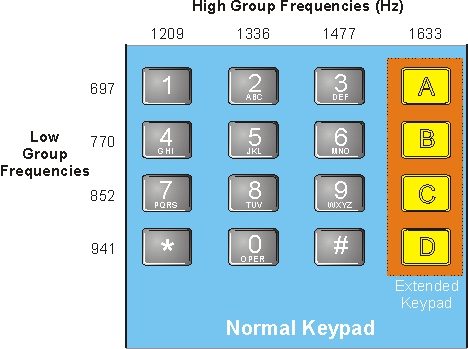

In [11]:
# Ignore the last column with the "extended" information. All letters should be looked up in the normal keypad.
from IPython.display import Image
Image('../images/DTMF_system.jpg', embed=True)